In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import copy

In [3]:
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
# Imported the module
from Model_CAR_NK import Model_obj_CAR_NK as obj_CAR_NK
from Model_Wt_NK import Model_obj_WT_NK as obj_WT_NK
from fitting import Model_fit, Model_Pred, Model_bw_pred
from imp_exp_data import cytof_data
from plotting import plot,R2_plot

In [4]:
Sys_CAR = obj_CAR_NK()
Sys_WT_NK = obj_WT_NK()

In [11]:
indx_mean_std = {'mean':18, 'std':27}
#data for Kasumi1 with WT, 50%, 75%, and 100%
mean_Kasumi1,ET_ratio  = cytof_data(row_index=indx_mean_std['mean'],sheet_name=0)
std_Kasumi1,_  = cytof_data(row_index=indx_mean_std['std'],sheet_name=0)
ET_ratio_num = np.array(ET_ratio)

In [12]:
LB = np.array([0.6,300,0.01,0.01,50,
               1.0e-2,
               1.0e-1,1.0e-2,
               1.0e-7])
UB = np.array([1.0,7000.0,0.6,0.6,2000,
               0.50e-0,
               1.0,1.0,
               1.5e-4])

In [13]:
opt = ['least_squares','minimize','pso']

In [17]:
def main_Kasumi1():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 30), (0, 70), (0, 20.0)]]
    Sys_CAR.Cell_type_R_L(NK_cell='CAR-NK H', Tumor_cell='Kasumi1',limts=MFI_limt)
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 30), (0, 70), (0, 20.0)]]
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT H', Tumor_cell='Kasumi1',limts=MFI_limt)
    x0 =[0.7669, 1052.0, 0.5187, 0.5431, 1066.0, 0.117, 0.1076, 0.05145, 6.077e-05]
    model_sys = (Sys_CAR,Sys_WT_NK)
    data = (mean_Kasumi1[-1],mean_Kasumi1[0],ET_ratio)
    return Model_fit(x0,LB,UB,model_sys,data,optimizer=opt[0],fit=False)
res0 = main_Kasumi1()

----- Optimized Parameters (2 sig. digits) -----
[0.7669, 1052.0, 0.5187, 0.5431, 1066.0, 0.117, 0.1076, 0.05145, 6.077e-05]
Cost = 477
Total Cost: 476.63972902237134


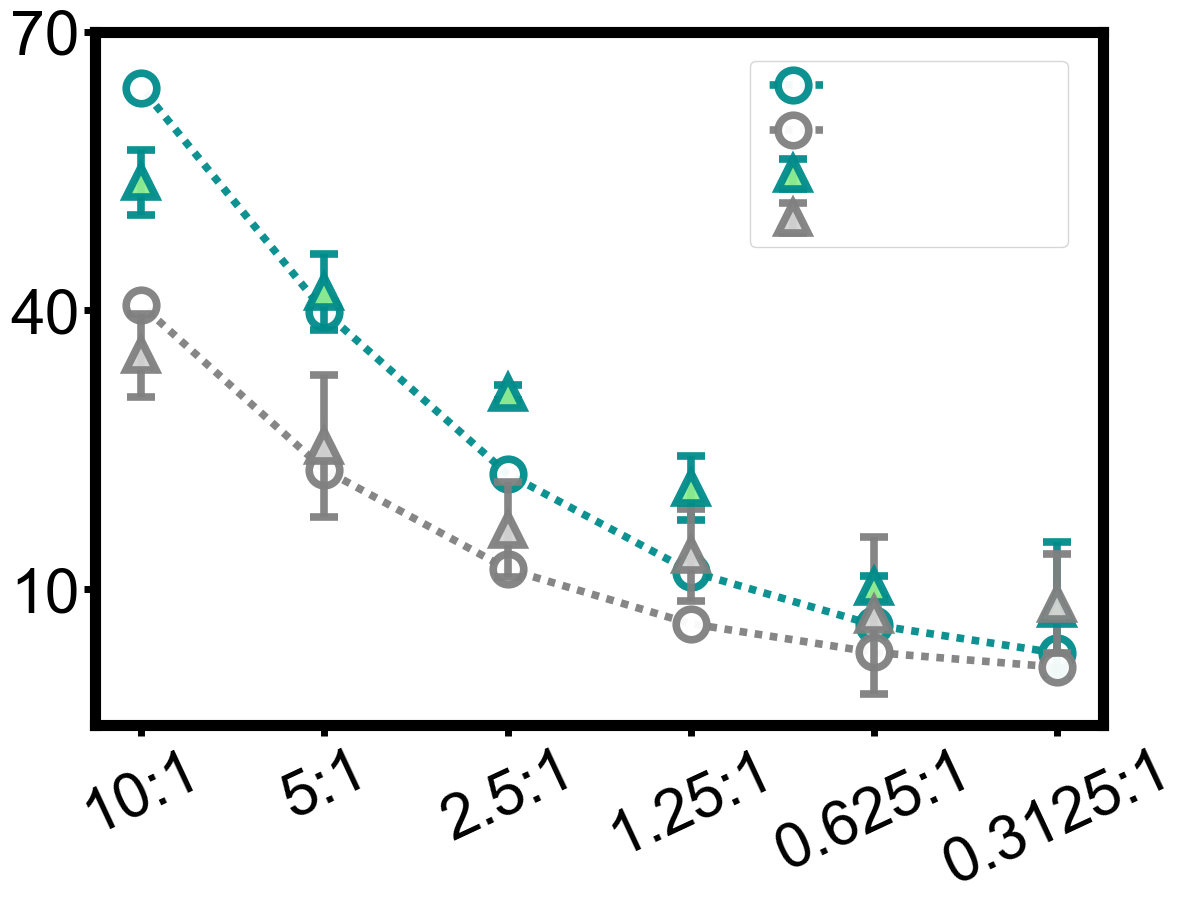

In [18]:
plot_color = ['darkcyan','gray','lightgreen','lightgray']
mean_data = (mean_Kasumi1[-1],mean_Kasumi1[0])
std_data = (std_Kasumi1[-1],std_Kasumi1[0])
plot(res0,mean_data,std_data,ET_ratio,[10,40,70], colors = plot_color,out_file='Kasumi1_CAR_NK_fit.pdf')

### Prediction of 75 and 50

In [19]:
Sys_CAR_75 = obj_CAR_NK()
Sys_CAR_50 = obj_CAR_NK()

In [31]:
def main_Middle():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 30), (0, 70), (0, 20.0)]]
    Sys_CAR_75.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Kasumi1',limts=MFI_limt,CAR_frac=0.75)
    Sys_CAR_50.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Kasumi1',limts=MFI_limt,CAR_frac=0.50)
    y0 = copy.deepcopy(res0[2])
    sys = (Sys_CAR_75,Sys_CAR_50)
    data = (mean_Kasumi1[2],mean_Kasumi1[1],ET_ratio)
    return Model_bw_pred(y0,sys,data)
res_Mix_K = main_Middle()

Total Cost: 1421.1973597727497


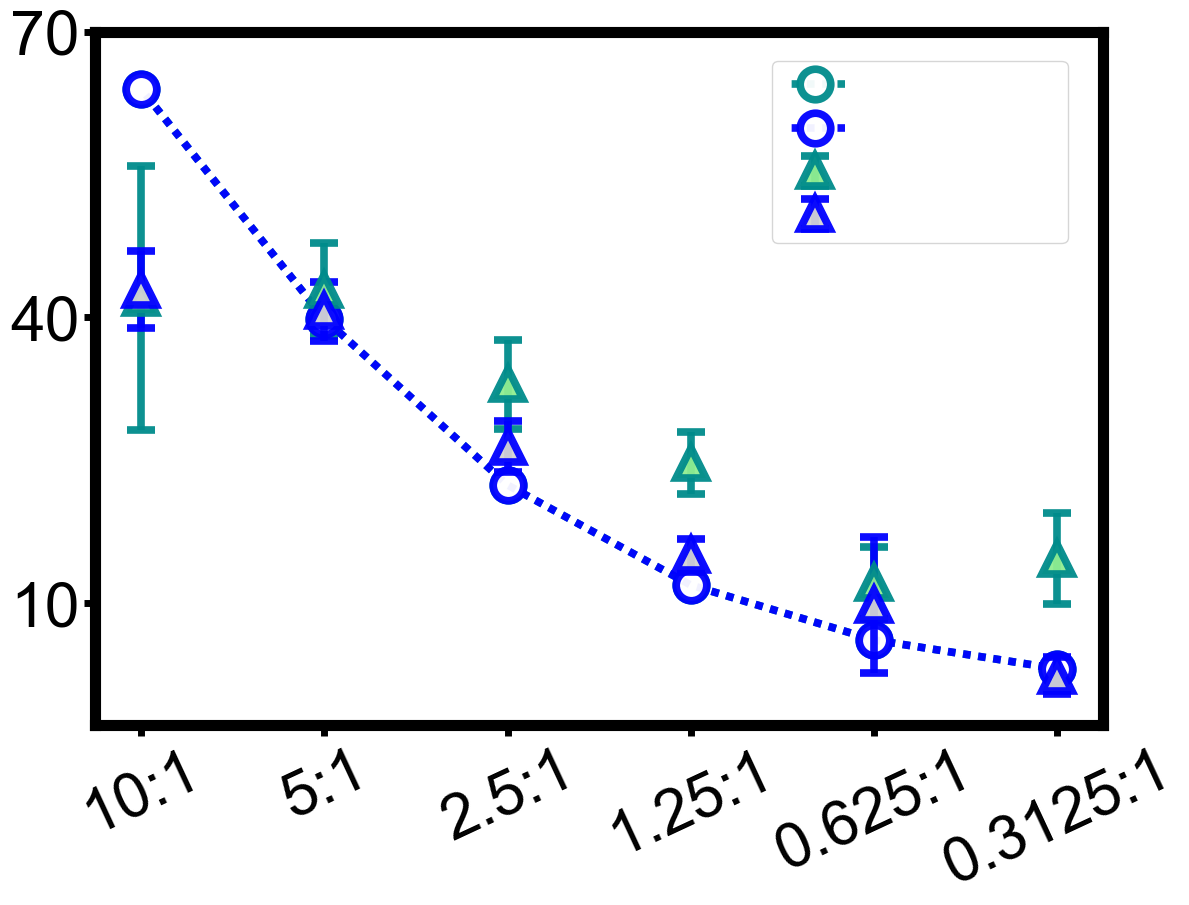

In [32]:
plot_color = ['darkcyan','blue','lightgreen','lightgray']
mean_data = (mean_Kasumi1[2],mean_Kasumi1[1])
std_data = (std_Kasumi1[2],std_Kasumi1[1])
plot(res_Mix_K,mean_data,std_data,ET_ratio,[10,40,70], colors = plot_color,out_file='Kasumi1_CAR_NK_75_50_Pred.pdf')

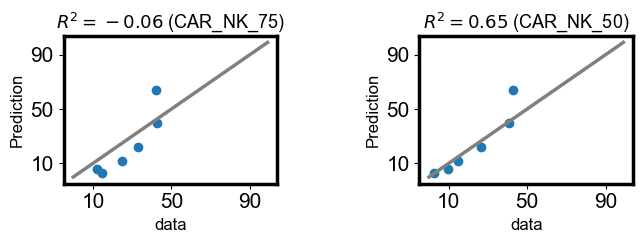

In [34]:
y_data = (mean_Kasumi1[2],mean_Kasumi1[1])
y_pred = (res_Mix_K[0],res_Mix_K[1])
title = ['CAR_NK_75','CAR_NK_50']
R2_plot(y_data, y_pred,title,out_file='R2_CAR_75_50.png')

# Prediction Mono by fitting WT

In [35]:
mean_Mono,ET_ratio  = cytof_data(row_index=indx_mean_std['mean'],sheet_name=1)
std_Mono,_  = cytof_data(row_index=indx_mean_std['std'],sheet_name=1)

In [36]:
LB = np.array([100,100,1.5e-7])
UB = np.array([20500,6500,1.0e-3])

In [37]:
def main_Pred():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 40), (0, 45), (0, 200.0)]]
    Sys_CAR.Cell_type_R_L(NK_cell='CAR-NK H', Tumor_cell='Monocyte',limts=MFI_limt)
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 40), (0, 45), (0, 200.0)]]
    Sys_WT_NK.Cell_type_R_L(NK_cell='WT H', Tumor_cell='Monocyte',limts=MFI_limt)
    x0 = [146.3, 1057.0, 0.0001421]
    model_sys = (Sys_CAR,Sys_WT_NK)
    y0 = copy.deepcopy(res0[2])
    data = (mean_Mono[-1],mean_Mono[0],ET_ratio,y0)
    return Model_Pred(x0,LB,UB,model_sys,data,fit=False,only_wt=True)
res1 = main_Pred()

----- Optimized Parameters (2 sig. digits) -----
[146.3, 1057.0, 0.0001421]
Cost = 77.3
Total Cost: 1322.9795314738972


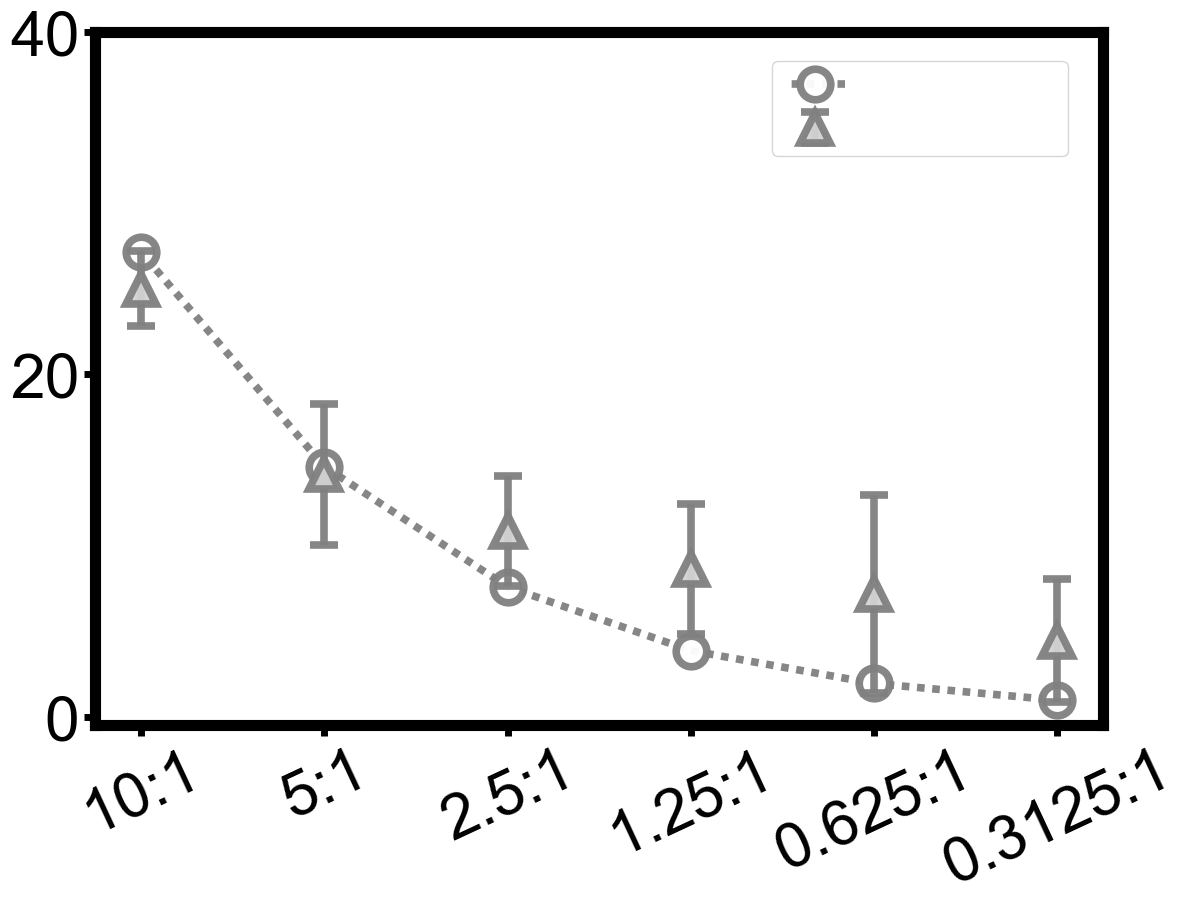

In [38]:
plot_color = ['gray','blue','lightgray','lightgray']
mean_data = [mean_Mono[0]]
std_data = [std_Mono[0]]
plot([res1[1]],mean_data,std_data,ET_ratio,[0,20,40], colors = plot_color,out_file='Mono_Wt_fit.pdf')

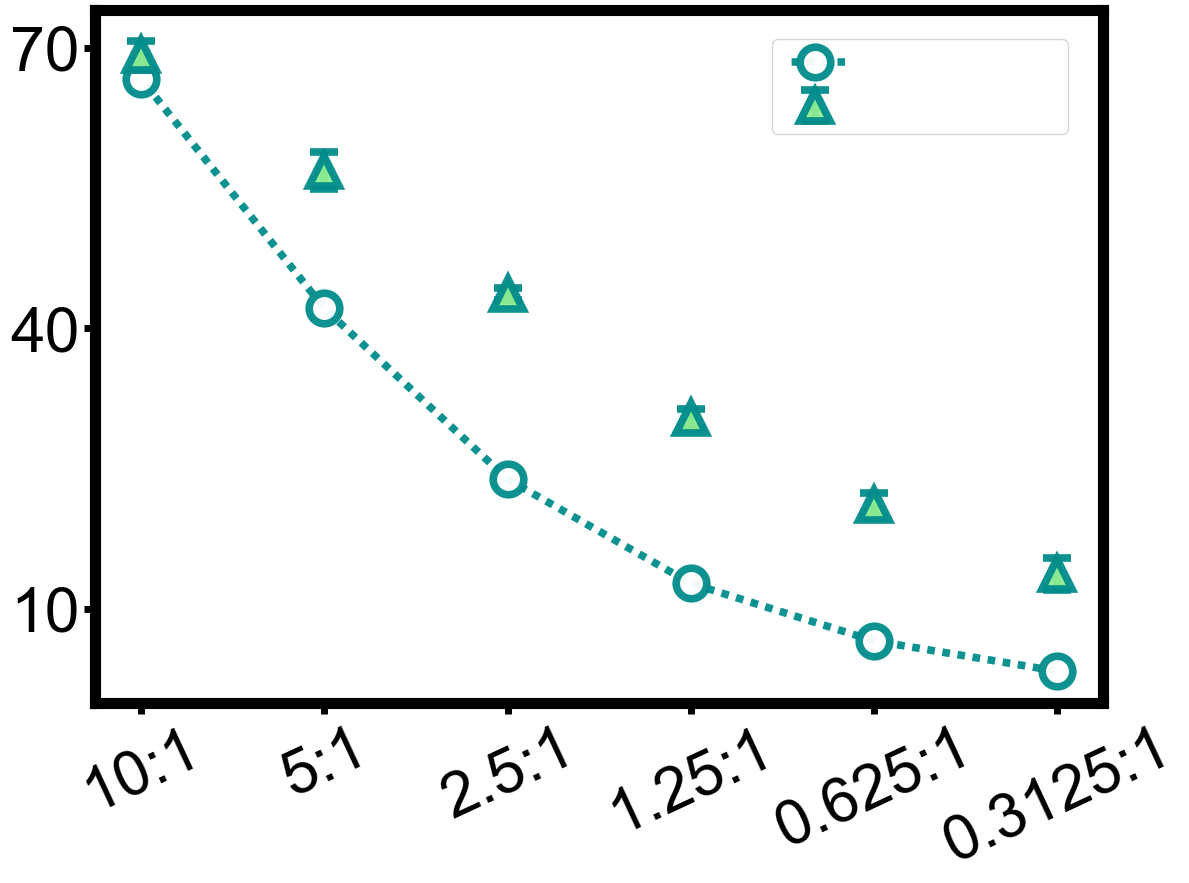

In [39]:
plot_color = ['darkcyan','blue','lightgreen','lightgray']
mean_data = [mean_Mono[-1]]
std_data = [std_Mono[-1]]
plot([res1[0]],mean_data,std_data,ET_ratio,[10,40,70], colors = plot_color,out_file='Mono_CAR-NK_Pred.pdf')

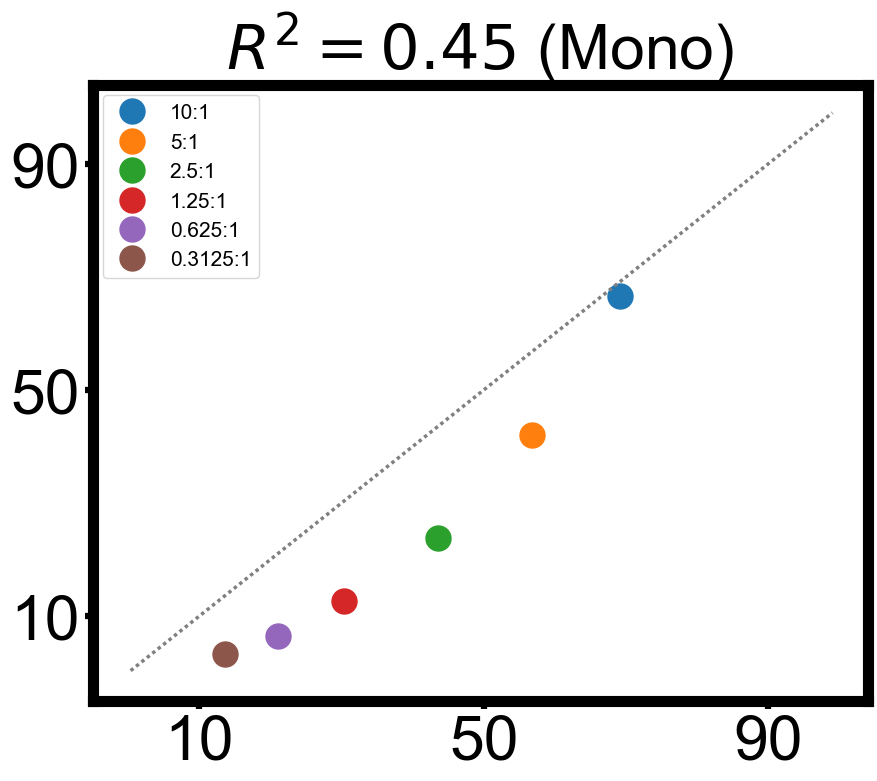

In [40]:
ls = [(1,(1,1)),(5, (10, 3)), (0,(2,2)), (0, (3, 1, 1, 1))]
plt.rcParams['axes.linewidth'] = 8
plt.rcParams['font.size'] = 59
plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(1,figsize = (10,8))
ax.tick_params(axis='both', which='major', labelsize=30, length=6, width=4.5)
for i in range(len(res1[0])):
    ax.plot(mean_Mono[-1][i], res1[0][i], 'o', markersize=18, label=f'{ET_ratio[i]}')

plt.plot(np.arange(0,100),np.arange(0,100),color='gray',lw=2.5,ls = ls[0])
#plt.xlabel('Data',fontsize =30)
#plt.ylabel('Prediction',fontsize =30)
plt.xticks([10,50,90],fontname="Arial",fontsize = 45)
plt.yticks([10,50,90],fontname="Arial",fontsize = 45)
plt.title(f'$R^2 = {r2_score(mean_Mono[-1], res1[0]):.2f}$ (Mono)',fontsize =45)
plt.legend(prop = {'size':15})
#plt.savefig('R2_Donor1_CAN_NK_Pred.png')
plt.show()

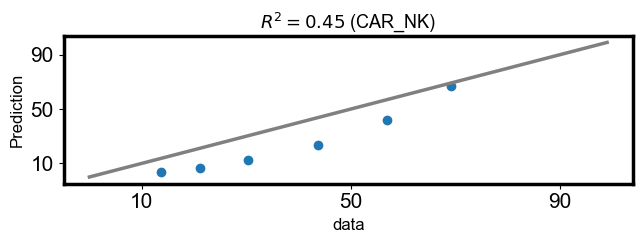

In [41]:
y_data = [mean_Mono[-1]]
y_pred = [res1[0]]
title = ['CAR_NK']
R2_plot(y_data, y_pred,title,out_file='R2_Mono.png')

In [44]:
def main_Middle():
    MFI_limt = [[(0, 100), (0, 300), (0.0, 50.0)], [(0, 40), (0, 45), (0, 200.0)]]
    Sys_CAR_75.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Monocyte',limts=MFI_limt, CAR_frac=0.75)
    Sys_CAR_50.Cell_type_R_L(NK_cell='MIX', Tumor_cell='Monocyte',limts=MFI_limt, CAR_frac=0.50)
    y0 = copy.deepcopy(res1[2])
    model_sys = (Sys_CAR_75,Sys_CAR_50)
    data = (mean_Mono[2],mean_Mono[1],ET_ratio)
    return Model_bw_pred(y0,model_sys,data)
res_Mix_Mono = main_Middle()

Total Cost: 1942.2217987622173


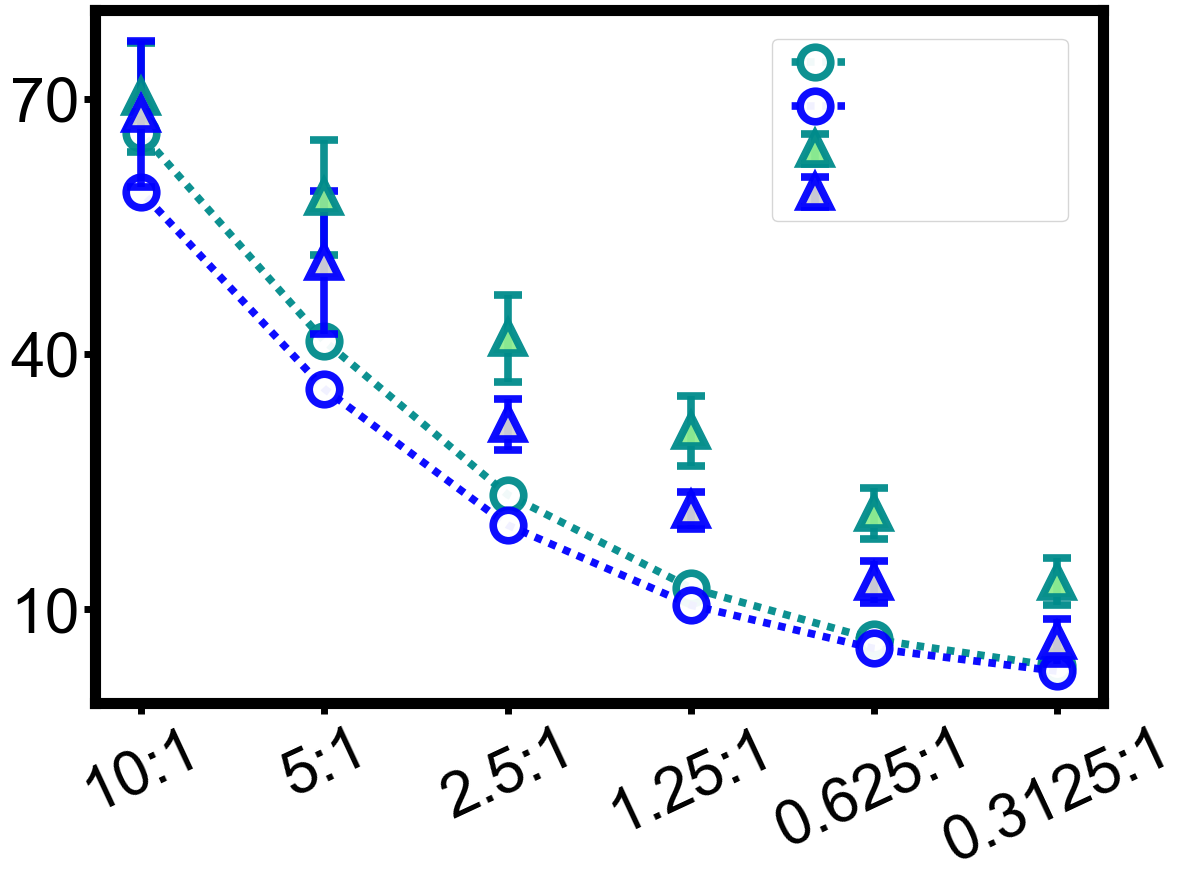

In [45]:
plot_color = ['darkcyan','blue','lightgreen','lightgray']
mean_data = (mean_Mono[2],mean_Mono[1])
std_data = (std_Mono[2],std_Mono[1])
plot(res_Mix_Mono,mean_data,std_data,ET_ratio,[10,40,70], colors = plot_color,out_file='Mono_CAR_NK_75_50_Pred.pdf')

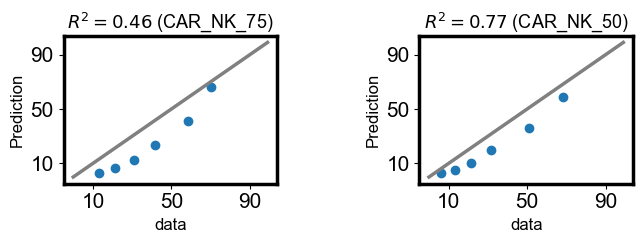

In [46]:
y_data = (mean_Mono[2],mean_Mono[1])
y_pred = (res_Mix_Mono[0],res_Mix_Mono[1])
title = ['CAR_NK_75','CAR_NK_50']
R2_plot(y_data, y_pred,title,out_file='R2_CAR_75_50.png')